In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../data/UniversalBank.csv")

In [3]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [4]:
# Step 1. Exploratory Data Analysis

In [5]:
#Drop irrelevant variables
data = data.drop(columns=["ID","ZIP Code"])

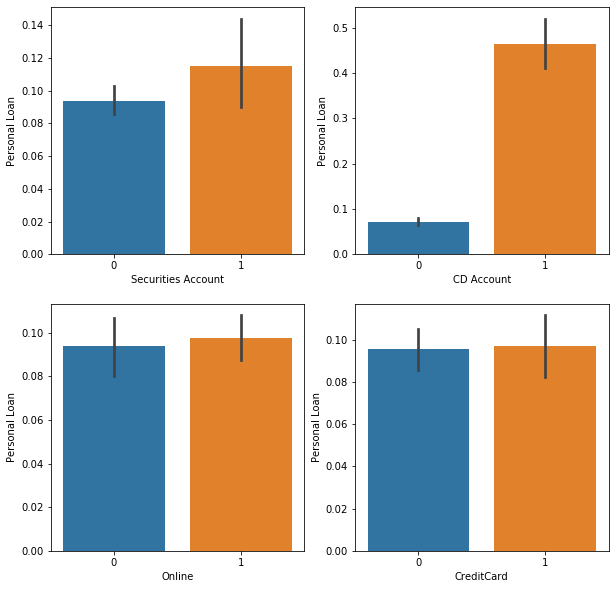

In [6]:
#Feature Analysis

cat_feature = ["Securities Account","CD Account", "Online", "CreditCard"]

fig, axes = plt.subplots(2, 2,figsize=(10,10))

for index,feature in enumerate(cat_feature):
    sns.barplot(x=feature, y="Personal Loan", data=data, ax=axes[int(index/2)][index%2])

plt.show()

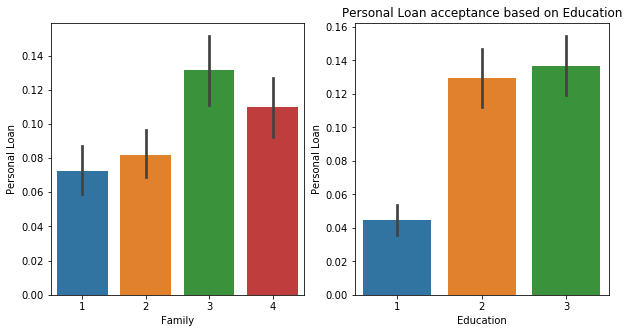

In [7]:
ordinal_features = ["Family","Education"]

fig, axes = plt.subplots(ncols=2,figsize=(10,5))

for index,feature in enumerate(ordinal_features):
    sns.barplot(x=feature, y="Personal Loan", data=data, ax=axes[int(index)])
    plt.title("Personal Loan acceptance based on {}".format(feature))

plt.show()

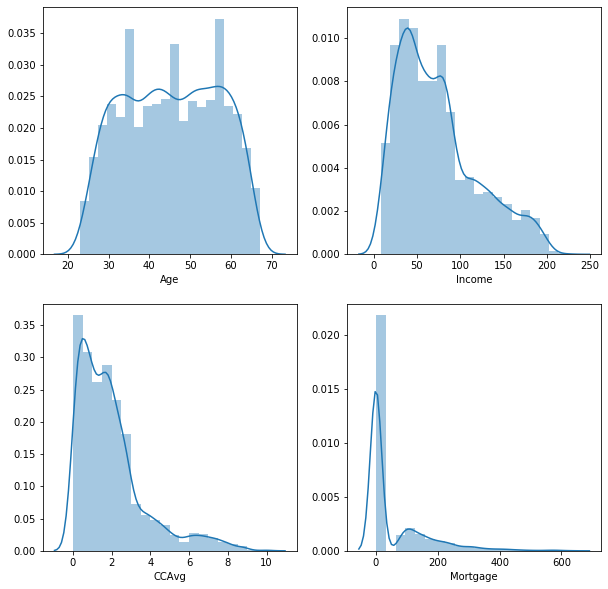

In [8]:
cont_features = [ "Age", "Income", "CCAvg", "Mortgage"]

fig, axes = plt.subplots(2, 2,figsize=(10,10))

for index,feature in enumerate(cont_features):
    sns.distplot(data[feature], bins=20, ax=axes[int(index/2)][index%2]);

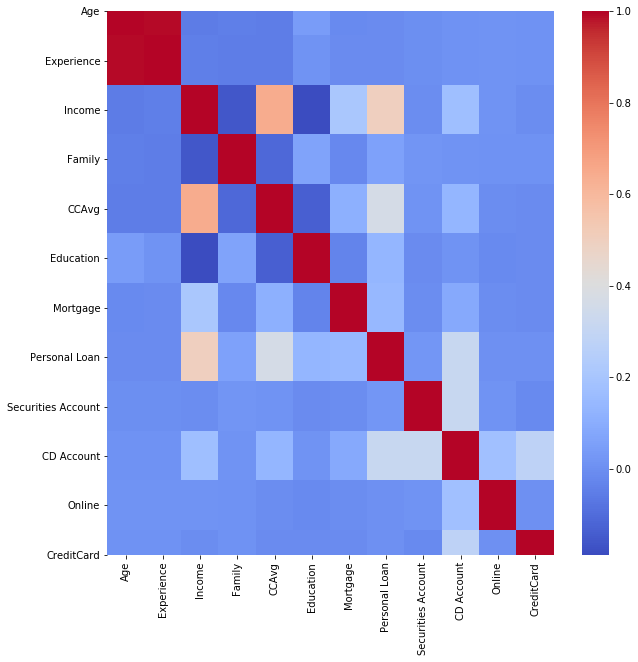

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cmap='coolwarm',fmt='.1g')
plt.show()

**Comment** : 
- CD account has a higher correlation with acceptance of loan than having a credit card or online banking.
- Education affects acceptance of loan
- Income and Average credit card spending have a higher correlation with each other. 
- Experience and Age have a high correlation
- Income and Mortrage data is highly skewed to the left. 

In [10]:
#Step 2. Preprocessing

#checking for total null values
data.isnull().sum() 

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [11]:
#Step 3. Train-test split

from sklearn.model_selection import train_test_split

train,test = train_test_split(data,test_size=0.2)
x_train,y_train = train.drop(columns=["Personal Loan"]),train["Personal Loan"]
x_test,y_test = test.drop(columns=["Personal Loan"]),test["Personal Loan"]


In [12]:
# Step 4. Modelling

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

# Model No. 1 Logistic REgression

model = LogisticRegression(random_state=0, max_iter=10000)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)

accuracy = accuracy_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

print(accuracy)
print(f1)

0.955
0.7715736040609137


In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Model No. 2 Random Forest
model = RandomForestClassifier()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)

accuracy = accuracy_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

print(accuracy)
print(f1)

0.992
0.9626168224299064


In [14]:
from xgboost import XGBClassifier

# Model no. 3 Model no. 3
model = XGBClassifier()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)

accuracy = accuracy_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

print(accuracy)
print(f1)

0.988
0.944954128440367


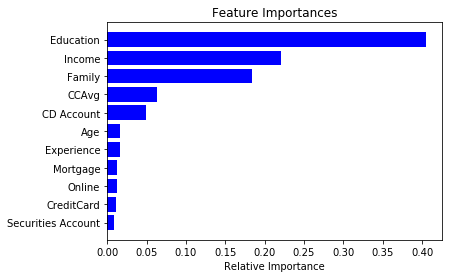

In [15]:
features = x_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Comment** :
- Tree based methods (RF and XGboost) perform better than Logistic Regression. LR was overfitting on the trainset and performed worse than RF on the valset
- Considering the feature importance from XGBoost, Education, Income and Family are **key drivers** and factors that should drive the campaigns for target audience. Considering possitive relation with target variables, the higher the education, income and family size, more is the person likely to accept the loan
- F1 score is considered as the metric and not accuracy (owing to class imbalace)